In [19]:
import nipype.algorithms.metrics #pip install nipype, if nipype is not already installed
import glob 
import re
v_performance=[]
v_cas=[]
#path = 'E:\\CTnet - O1\\Predictions\\'
#path = 'E:\\CTnet - O2\\Predictions\\'
#path = 'E:\\4Dnet - LALAA\\Predictions\\'
#path = 'E:\\4Dnet - LALVAorta\\Predictions\\'
#path = 'E:\\predict25\\'
#path = 'E:\\predict08\\'
#path = 'E:\\predict09\\'
path = 'E:\\predict26\\'
ims = glob.glob(path+"\\*.nii.gz")
#path2 = 'E:\\CTnet - O1\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task003_LALAA\\labelsTs\\'
#path2 = 'E:\\CTnet - O2\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task004_LALAA\\labelsTs\\'
#path2 = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\labelsTs\\'
#path2 = 'E:\\new4d_LV\\final_seg\\'
path2 = 'E:\\TL_GT\\'

ims2 = glob.glob(path2+"\\*.nii.gz")

for ii in range(0,len(ims)):
    overlap = nipype.algorithms.metrics.Overlap()
    
    case =  re.sub("[^0-9]", "", ims[ii][-15:-7])
    #case =  re.sub("[^0-9]", "", ims[ii][-21:-7])
    overlap.inputs.volume1 = path+str(case)+'.nii.gz'
    #overlap.inputs.volume2 = path2+str(case)+'.nii.gz'
    overlap.inputs.volume2 = path2+'case'+str(case)+'_1.nii.gz'
    #overlap.inputs.volume2 = path2+'case'+str(case[1:])+'_1.nii.gz'
    res = overlap.run() 
    print('Dice coefficient = ' + str(res.outputs.dice))
    v_performance.append(res.outputs.dice)
    v_cas.append('Case ' +str(ii+1))
    #v_cas.append('Case ' +str(case[1:]))

Dice coefficient = 0.0148
Dice coefficient = 0.10109
Dice coefficient = 0.0614
Dice coefficient = 0.05318
Dice coefficient = 0.01618
Dice coefficient = 0.00018
Dice coefficient = 0.0795
Dice coefficient = 0.00116
Dice coefficient = 0.0
Dice coefficient = 0.01297
Dice coefficient = 0.00522
Dice coefficient = 0.10665
Dice coefficient = 0.09356
Dice coefficient = 0.00947


In [14]:
import nipype.algorithms.metrics #pip install nipype, if nipype is not already installed
import glob 
import re
from scipy.spatial.distance import directed_hausdorff
v_hs=[]
#path = 'E:\\CTnet - O1\\Predictions\\'
#path = 'E:\\CTnet - O2\\Predictions\\'
path = 'E:\\4Dnet - LALAA\\Predictions\\'
#path = 'E:\\4Dnet - LALVAorta\\Predictions\\'

ims = glob.glob(path+"\\*.nii.gz")
#path2 = 'E:\\CTnet - O1\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task003_LALAA\\labelsTs\\'
#path2 = 'E:\\CTnet - O2\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task004_LALAA\\labelsTs\\'
path2 = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\labelsTs\\'
#path2 = 'E:\\new4d_LV\\final_seg\\'

ims2 = glob.glob(path2+"\\*.nii.gz")

for ii in range(0,len(ims)):
    
    #case =  re.sub("[^0-9]", "", ims[ii][-17:-7])
    case =  re.sub("[^0-9]", "", ims[ii][-15:-7])
    distance = nipype.algorithms.metrics.Distance()
    distance.inputs.volume1 = path+str(case)+'.nii.gz'
    distance.inputs.volume2 = path2+str(case)+'.nii.gz'
    #distance.inputs.volume2 = path2+'case'+str(case[1:])+'_1.nii.gz'
    distance.inputs.method = 'eucl_max'

    res = distance.run() 
    print(path+str(case)+'.nii.gz')
    print(path2+'case'+str(case[1:])+'_1.nii.gz')
    print('Hausdorff distance = ' + str(res.outputs.distance))
    v_hs.append(res.outputs.distance)

E:\4Dnet - LALAA\Predictions\54729790.nii.gz
E:\4Dnet - LALAA\nnUNet_raw_data_base\nnUNet_raw_data\Task005_LALAA\labelsTs\case4729790_1.nii.gz
Hausdorff distance = 9.060158062472297
E:\4Dnet - LALAA\Predictions\54735214.nii.gz
E:\4Dnet - LALAA\nnUNet_raw_data_base\nnUNet_raw_data\Task005_LALAA\labelsTs\case4735214_1.nii.gz
Hausdorff distance = 14.27417405979517
E:\4Dnet - LALAA\Predictions\54773094.nii.gz
E:\4Dnet - LALAA\nnUNet_raw_data_base\nnUNet_raw_data\Task005_LALAA\labelsTs\case4773094_1.nii.gz
Hausdorff distance = 12.039743143499356
E:\4Dnet - LALAA\Predictions\54847165.nii.gz
E:\4Dnet - LALAA\nnUNet_raw_data_base\nnUNet_raw_data\Task005_LALAA\labelsTs\case4847165_1.nii.gz
Hausdorff distance = 12.057039834848627
E:\4Dnet - LALAA\Predictions\54936544.nii.gz
E:\4Dnet - LALAA\nnUNet_raw_data_base\nnUNet_raw_data\Task005_LALAA\labelsTs\case4936544_1.nii.gz
Hausdorff distance = 15.40690096567424
E:\4Dnet - LALAA\Predictions\54936687.nii.gz
E:\4Dnet - LALAA\nnUNet_raw_data_base\nnUNe

In [15]:
import nipype.algorithms.metrics #pip install nipype, if nipype is not already installed
import glob 
import re
from medpy.io import load # libreria python medimages
from scipy import ndimage, misc
from skimage import data, color
from scipy.spatial.distance import directed_hausdorff
import numpy as np

# credits to Kristine A. Juhl

v_cd=[]

#path = 'E:\\CTnet - O1\\Predictions\\'
#path = 'E:\\CTnet - O2\\Predictions\\'
path = 'E:\\4Dnet - LALAA\\Predictions\\'
#path = 'E:\\4Dnet - LALVAorta\\Predictions\\'
ims = glob.glob(path+"\\*.nii.gz")

#path2 = 'E:\\CTnet - O1\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task003_LALAA\\labelsTs\\'
#path2 = 'E:\\CTnet - O2\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task004_LALAA\\labelsTs\\'
path2 = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\labelsTs\\'
#path2 = 'E:\\new4d_LV\\final_seg\\'
ims2 = glob.glob(path2+"\\*.nii.gz")

for ii in range(0,len(ims)):
    
    case =  re.sub("[^0-9]", "", ims[ii][-17:-7])
    
    GT,image_head1 = load(path2+str(case)+'.nii.gz')
    PRED,image_head2 = load(path+str(case)+'.nii.gz')
    d = round(v_hs[ii]); # d: distance from GT to contour that is evaluated
    #create mask around the contour
    struct_size = d 
    structure = np.ones((struct_size,struct_size,struct_size))
    outer = ndimage.binary_dilation(GT, structure = structure).astype(int)
    inner = ndimage.binary_erosion(GT, structure = structure).astype(int)
    GTmask = outer-inner
    
    PredMask = PRED
    PredMask[GTmask == 0] = 100
    TrueMask = GT
    TrueMask[GTmask == 0] = 100
    TP = np.sum(PredMask[TrueMask==1]==1)
    TN = np.sum(PredMask[TrueMask==0]==0)
    FP = np.sum(PredMask[TrueMask==1]==0)
    FN = np.sum(PredMask[TrueMask==0]==1)
    
    contourDice = (2*TP) / (2*TP + FP + FN)
    
    v_cd.append(contourDice)

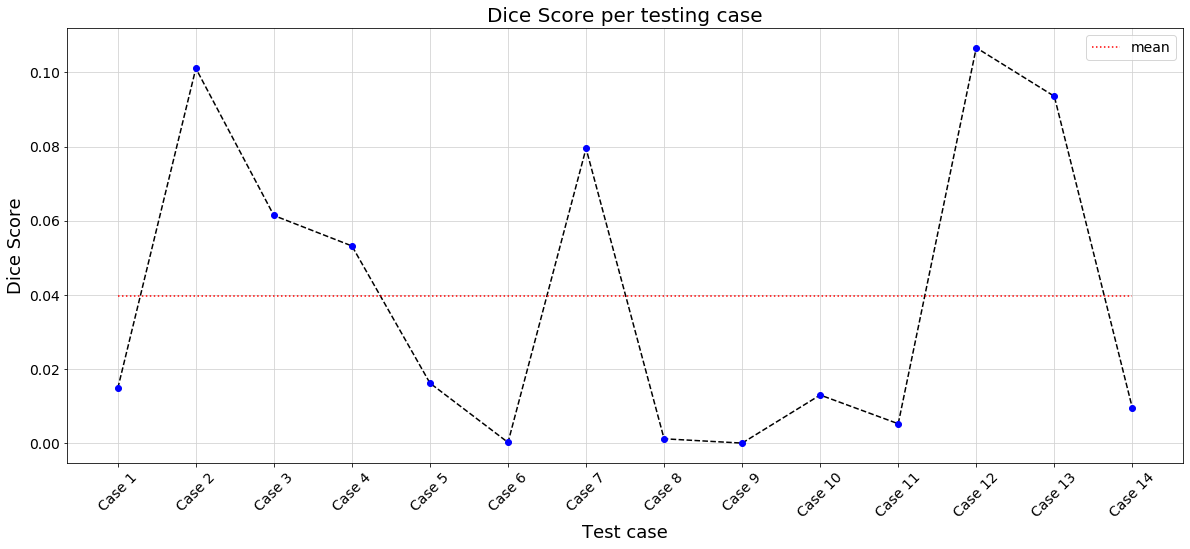

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
x = np.linspace(0,len(v_cas),len(v_cas))
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, v_performance,'black', linestyle = '--')
ax.plot(x,v_performance,'ob')
ax.plot(x,[np.mean(v_performance)]*len(x),'red', linestyle = ':',label='mean')
ax.set_xticks(x); ax.set_xticklabels(v_cas, rotation = 45)
plt.ylabel('Dice Score', fontsize=18)
plt.xlabel('Test case', fontsize=18)
plt.title('Dice Score per testing case', fontsize=20)
plt.tick_params(labelsize=14)
plt.grid(color='lightgray', linestyle='-', linewidth=0.8)
plt.legend(fontsize=14)

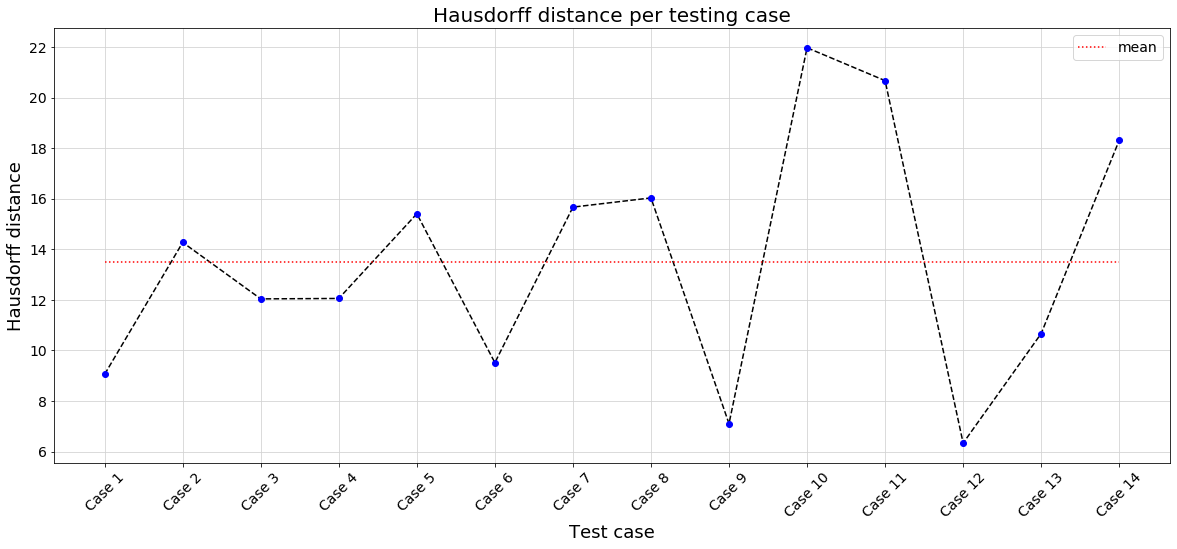

In [17]:
x = np.linspace(0,len(v_cas),len(v_cas))
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, v_hs,'black', linestyle = '--')
ax.plot(x,v_hs,'ob')
ax.plot(x,[np.mean(v_hs)]*len(x),'red', linestyle = ':',label='mean')
ax.set_xticks(x); ax.set_xticklabels(v_cas, rotation = 45)
plt.ylabel('Hausdorff distance', fontsize=18)
plt.xlabel('Test case', fontsize=18)
plt.title('Hausdorff distance per testing case', fontsize=20)
plt.tick_params(labelsize=14)
plt.grid(color='lightgray', linestyle='-', linewidth=0.8)
plt.legend(fontsize=14)

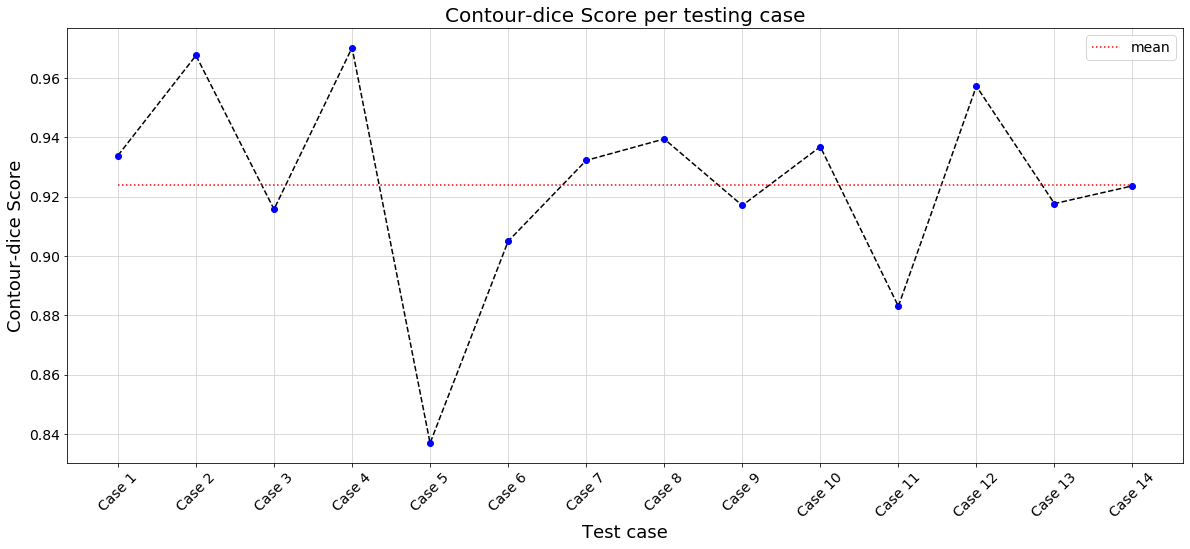

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
x = np.linspace(0,len(v_cas),len(v_cas))
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, v_cd,'black', linestyle = '--')
ax.plot(x,v_cd,'ob')
ax.plot(x,[np.mean(v_cd)]*len(x),'red', linestyle = ':',label='mean')
ax.set_xticks(x); ax.set_xticklabels(v_cas, rotation = 45)
plt.ylabel('Contour-dice Score', fontsize=18)
plt.xlabel('Test case', fontsize=18)
plt.title('Contour-dice Score per testing case', fontsize=20)
plt.tick_params(labelsize=14)
plt.grid(color='lightgray', linestyle='-', linewidth=0.8)
plt.legend(fontsize=14)

In [13]:
np.mean(v_performance)

0.03966857142857143

In [ ]:
np.mean(v_hs)

In [ ]:
np.mean(v_cd)